In [ ]:
#аугментации изображений
#!pip install albumentations -q


In [1]:
!pip install -q tensorflow==2.3

ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.


In [ ]:
#!pip uninstall tensorflow -y
#!pip install tensorflow==2.3.0

In [2]:
!pip freeze > requirements.txt

In [3]:
# Импортируем библиотеки

import pandas as pd # импортируем необходимые библиотеки
import numpy as np
import re
import random
import os
import sys
import PIL
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import ExtraTreeRegressor
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from catboost import CatBoostRegressor

from tqdm import tqdm
from tqdm.notebook import tqdm

from itertools import combinations
from scipy.stats import ttest_ind


# # keras
import tensorflow as tf
import tensorflow.keras.layers as L
#from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#import albumentations
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models #as M
#import tensorflow.keras.layers as L
import tensorflow.keras.backend #as K
from tensorflow.keras import optimizers

import nltk
from nltk.corpus import stopwords

# plt
import matplotlib.pyplot as plt
import seaborn as sns
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
#DATA_PATH = "/content/drive/My Drive/cars2/"
#PATH = "/content/"  # рабочая директория

In [ ]:
#from tensorflow.keras import optimizers

In [4]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob
from glob import iglob
from keras.applications import InceptionV3
#from keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense ,LeakyReLU

Using TensorFlow backend.


In [5]:
from collections import Counter
from keras.applications import VGG16
# Confusion Matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report
import itertools 

In [6]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Tensorflow   :', tf.__version__)

Python       : 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
Numpy        : 1.18.1
Tensorflow   : 2.3.0


In [7]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42
#np.random.seed(RANDOM_SEED)

In [ ]:
# Загрузим данные, в том числе предобработанный датасет

#DATA_DIR = '../input/sf-dst-car-price-prediction-part2/'
#train1 = pd.read_csv(DATA_DIR + 'train.csv')
#test = pd.read_csv(DATA_DIR + 'test.csv')
#sample_submission = pd.read_csv(DATA_DIR + 'sample_submission.csv')
#train = pd.read_csv('../input/edatrain/train_batmobil7.csv')

In [8]:
train_path = "/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
test_path = "/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"

In [ ]:
train_path

In [9]:
# ResNet50 image size
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)
IMG_SIZE             = 224 # какого размера подаем изображения в сеть 224
IMG_CHANNELS         = 3   # у RGB 3 канала
input_shape          = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)
# Keras settings
BATCH_SIZE = 64
VAL_BATCH_SIZE = 8
EPOCHS = 10
LR = 0.0001

**Testing paths and images **



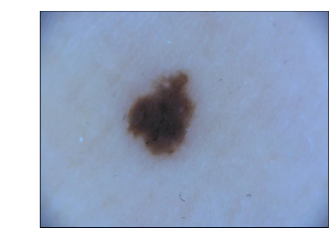

In [10]:
img = PIL.Image.open(train_path + "nevus/ISIC_0000041.jpg") # load_img(train_path + "nevus/ISIC_0000041.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


**convert images to array** 


**show to shape** 

In [11]:
x = img_to_array(img)
print(x.shape)

(1129, 1504, 3)


In [ ]:
x


**Using the glob function, we learn how many different folders there are in the dataset.**

In [12]:

className = glob(train_path + '/*' )
numberOfClass = len(className)
print("NumberOfClass: ",numberOfClass)

NumberOfClass:  9


In [13]:
className

['/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis',
 '/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma',
 '/kaggle/input/skin-cancer9-classesisic/

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 60,
    brightness_range = [0.5, 1.5],
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2, # set validation split
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=[0.75,1.25],
    fill_mode='reflect')

       
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [15]:

# Завернем наши данные в генератор:

train_generator = train_datagen.flow_from_directory(
    train_path,      # директория где расположены папки с картинками 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, seed=RANDOM_SEED,
    subset='training') # set as training data

test_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True, seed=RANDOM_SEED,
    subset='validation') # set as validation data



Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


In [ ]:
#Распределение данных

In [74]:
def percentage_value(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_dataset_description(path, title):
    classes = []
    for filename in iglob(os.path.join(path, "**","*.jpg")):
        classes.append(os.path.split(os.path.split(filename)[0])[-1])

    classes_cnt = Counter(classes)
    values = list(classes_cnt.values())
    labels = list(classes_cnt.keys())

    plt.figure(figsize=(8,8))
    plt.pie(values, labels=labels, autopct=lambda pct: percentage_value(pct, values), 
            shadow=True, startangle=140)

    plt.title(title)    
    plt.show()

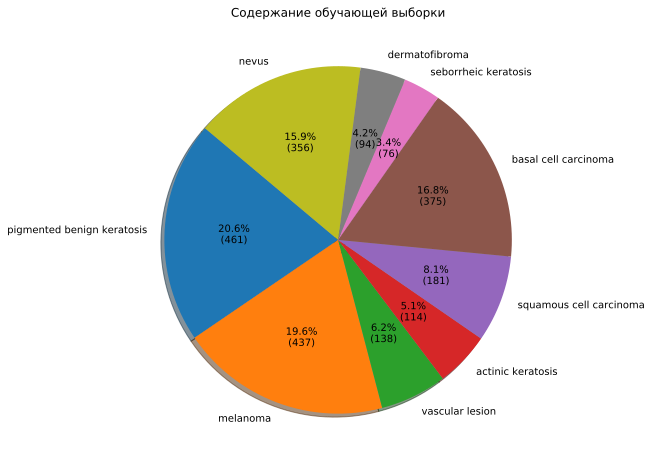

In [75]:
plot_dataset_description(os.path.join(train_path), "Содержание обучающей выборки")

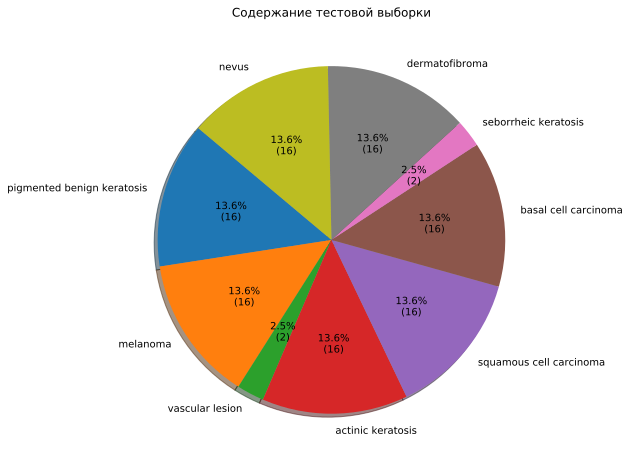

In [76]:
plot_dataset_description(os.path.join(test_path), "Содержание тестовой выборки")

In [ ]:
#model = Sequential()
#model.add(InceptionV3(include_top=False, weights='imagenet',input_shape=(3,299,299)))
#model.add(Flatten(input_shape=(3,299,299)[1:]))
#model.add(Dense(32))
#model.add(LeakyReLU(0.001))
#model.add(Dense(16))
#model.add(LeakyReLU(0.001))
#model.add(Dense(numberOfClass, activation='softmax'))
#model.layers[0].trainable = False1129, 1504, 3)

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
#model.summary()

In [18]:
vgg_model = Xception(weights='imagenet', include_top=False, input_shape = input_shape)

83689472/83683744 [==============================] - 1s 0us/step


In [19]:
for layer in vgg_model.layers[:-4]:
    layer.trainable = False

In [20]:
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_model)
 
# Add new layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass, activation='softmax'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 1

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.001),
              metrics=['acc'])

In [23]:
checkpoint = ModelCheckpoint('best_model.hdf5' , monitor = ['val_accuracy'] , verbose = 1  , mode = 'max')
callbacks_list = [checkpoint]

In [24]:
%%time
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=test_generator,
        validation_steps=test_generator.samples//test_generator.batch_size,
        callbacks = callbacks_list)

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 3.9879 - acc: 0.2270 
Epoch 00001: saving model to best_model.hdf5
28/28 [==============================] - 442s 16s/step - loss: 3.9879 - acc: 0.2270 - val_loss: 1.8048 - val_acc: 0.4089
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 2.0125 - acc: 0.3079 
Epoch 00002: saving model to best_model.hdf5
28/28 [==============================] - 476s 17s/step - loss: 2.0125 - acc: 0.3079 - val_loss: 1.9076 - val_acc: 0.3229
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 1.8039 - acc: 0.3599 
Epoch 00003: saving model to best_model.hdf5
28/28 [==============================] - 491s 18s/step - loss: 1.8039 - acc: 0.3599 - val_loss: 2.0218 - val_acc: 0.4167
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 1.7269 - acc: 0.4055 
Epoch 00004: saving model to best_model.hdf5
28/28 [==============================] - 496s 18s/step - loss: 1.7269 - acc: 0.4055 - val_loss: 1

In [25]:
# сохраним итоговую сеть и подгрузим лучшую итерацию в обучении (best_model)
model.save('../working/model_last.hdf5')
model.load_weights('best_model.hdf5')

In [35]:
history.history['acc']

[0.22703640162944794,
 0.30791449546813965,
 0.3599075675010681,
 0.4055459201335907,
 0.4378971755504608,
 0.45811671018600464,
 0.4384748637676239,
 0.47949162125587463,
 0.506065845489502,
 0.523974597454071]

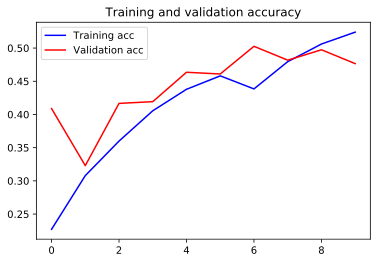

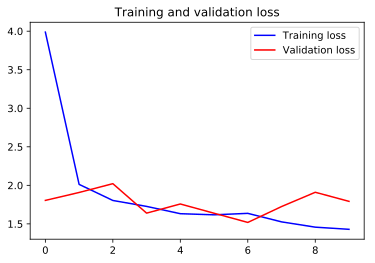

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [37]:
scores = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 72s 10s/step - loss: 1.6960 - acc: 0.4752
Accuracy: 47.52%


In [ ]:
# Confugn matrix

In [52]:
%%time
Y_pred = model.predict_generator(test_generator,verbose=1)  #, steps=test_generator.samples//test_generator.batch_size)

7/7 [==============================] - 71s 10s/step
CPU times: user 2min 11s, sys: 22.1 s, total: 2min 33s
Wall time: 1min 27s


In [119]:
Y_pred

array([[1.30769825e-02, 3.45226042e-02, 9.55406576e-03, ...,
        1.09086875e-02, 3.72171439e-02, 8.27281922e-03],
       [9.91236567e-02, 1.20851673e-01, 8.80509093e-02, ...,
        8.77875686e-02, 1.26961827e-01, 8.23590308e-02],
       [2.18295623e-02, 2.02647582e-01, 1.09938476e-02, ...,
        9.60299466e-03, 6.55144528e-02, 6.72300309e-02],
       ...,
       [4.15467657e-02, 3.96628439e-01, 4.19952311e-02, ...,
        1.08528035e-02, 1.24527931e-01, 3.66105065e-02],
       [6.11087158e-02, 8.05529654e-02, 6.52676448e-02, ...,
        1.32540897e-01, 1.05374150e-01, 3.60537395e-02],
       [2.41287124e-09, 2.28438676e-05, 9.41828873e-08, ...,
        3.71632814e-06, 2.40208720e-07, 3.42130960e-07]], dtype=float32)

In [55]:
y_pred2 = np.argmax(Y_pred, axis=1)
y_pred2

array([4, 3, 5, 4, 4, 5, 4, 3, 4, 8, 3, 5, 1, 4, 4, 5, 5, 4, 5, 4, 5, 5,
       5, 5, 4, 8, 4, 5, 5, 1, 5, 3, 4, 1, 5, 1, 4, 3, 5, 5, 8, 5, 5, 5,
       5, 4, 5, 5, 2, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 3, 4, 5,
       5, 2, 2, 5, 4, 2, 1, 1, 4, 4, 1, 5, 1, 5, 4, 5, 3, 8, 1, 1, 5, 3,
       5, 5, 8, 5, 1, 5, 5, 4, 4, 5, 5, 1, 5, 2, 3, 4, 4, 4, 3, 1, 5, 1,
       4, 5, 5, 4, 4, 1, 1, 4, 4, 4, 4, 4, 3, 1, 5, 5, 1, 4, 4, 1, 4, 5,
       5, 4, 3, 5, 5, 1, 1, 5, 4, 2, 4, 4, 4, 5, 4, 1, 4, 1, 5, 5, 5, 5,
       1, 3, 5, 5, 3, 4, 1, 1, 4, 4, 8, 3, 5, 5, 5, 4, 4, 4, 8, 4, 1, 4,
       8, 1, 3, 5, 5, 5, 5, 5, 4, 1, 5, 5, 4, 5, 5, 5, 5, 5, 1, 5, 8, 4,
       2, 4, 1, 2, 5, 5, 2, 3, 1, 4, 4, 3, 3, 5, 5, 5, 4, 4, 5, 5, 5, 5,
       5, 1, 2, 4, 4, 8, 3, 5, 4, 1, 5, 1, 3, 5, 5, 4, 4, 5, 1, 2, 1, 4,
       2, 5, 5, 5, 3, 3, 4, 5, 3, 3, 1, 5, 5, 8, 1, 2, 4, 5, 3, 8, 1, 3,
       8, 3, 4, 4, 5, 8, 5, 5, 3, 3, 5, 3, 3, 5, 4, 3, 2, 4, 5, 5, 3, 5,
       5, 5, 3, 5, 3, 5, 4, 5, 4, 4, 4, 5, 1, 5, 5,

In [62]:
len(y_pred2)

444

In [57]:
(test_generator.classes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [59]:
cnf_matrix = confusion_matrix(test_generator.classes, y_pred2)

In [72]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=8)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)

In [67]:
classes = {v: k for k, v in train_generator.class_indices.items()}
print(classes)

{0: 'actinic keratosis', 1: 'basal cell carcinoma', 2: 'dermatofibroma', 3: 'melanoma', 4: 'nevus', 5: 'pigmented benign keratosis', 6: 'seborrheic keratosis', 7: 'squamous cell carcinoma', 8: 'vascular lesion'}


In [82]:
list(classes.values())

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

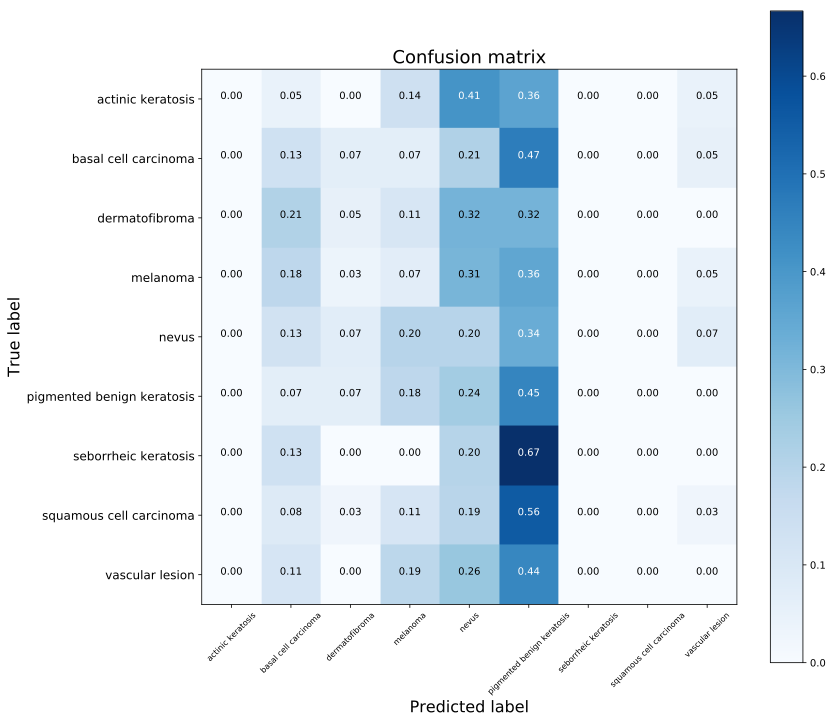

In [73]:
plot_confusion_matrix(cnf_matrix, list(classes.values()))

In [83]:
# классификация ответов

print(classification_report(test_generator.classes, y_pred2, target_names=list(classes.values())))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        22
      basal cell carcinoma       0.19      0.13      0.16        75
            dermatofibroma       0.05      0.05      0.05        19
                  melanoma       0.11      0.07      0.08        87
                     nevus       0.13      0.20      0.15        71
pigmented benign keratosis       0.22      0.45      0.29        92
      seborrheic keratosis       0.00      0.00      0.00        15
   squamous cell carcinoma       0.00      0.00      0.00        36
           vascular lesion       0.00      0.00      0.00        27

                  accuracy                           0.16       444
                 macro avg       0.08      0.10      0.08       444
              weighted avg       0.12      0.16      0.13       444



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# тестовая демонстрация

In [114]:
train_path

'/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

In [138]:
def load_image(filename):
    img = cv2.imread(os.path.join(train_path, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    return img


#def predict(image):
#    probabilities = model.predict(np.asarray([img]))[0]
#    class_idx = np.argmax(probabilities)
  #  idx = (-pr).argsort()[:3]
#    return {classes[class_idx]: probabilities[class_idx]}

In [162]:
def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = (-probabilities).argsort()[:3]
    return class_idx, probabilities[class_idx]

In [120]:
img2=load_image('/kaggle/input/skin-cancer9-classesisic/skin cancer isic the international skin imaging collaboration/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+'vascular lesion/ISIC_0025707.jpg')

In [142]:
img3=np.asarray([img2])
img3

array([[[[0.65098039, 0.58823529, 0.83529412],
         [0.65882353, 0.6       , 0.85098039],
         [0.64313725, 0.58039216, 0.83137255],
         ...,
         [0.65098039, 0.59607843, 0.81960784],
         [0.6627451 , 0.6       , 0.81960784],
         [0.64705882, 0.58823529, 0.81176471]],

        [[0.63137255, 0.59215686, 0.83529412],
         [0.64313725, 0.57647059, 0.83921569],
         [0.65098039, 0.58431373, 0.84313725],
         ...,
         [0.65490196, 0.59607843, 0.83137255],
         [0.65490196, 0.59215686, 0.82352941],
         [0.64705882, 0.58823529, 0.81176471]],

        [[0.65098039, 0.59215686, 0.84705882],
         [0.64313725, 0.57647059, 0.83529412],
         [0.63921569, 0.58823529, 0.83529412],
         ...,
         [0.64313725, 0.58823529, 0.81960784],
         [0.65098039, 0.58823529, 0.81568627],
         [0.62352941, 0.58039216, 0.80784314]],

        ...,

        [[0.60784314, 0.60392157, 0.80392157],
         [0.62352941, 0.59607843, 0.80392157]

In [143]:
pr = model.predict(img3)[0]

In [161]:
pr[idx]

array([0.93359137, 0.02289592, 0.01965601], dtype=float32)

In [145]:
#pr
class_idx1 = np.argmax(pr)


5

In [177]:
np.argpartition(pr, -3)[-3:]

array([3, 4, 5])

In [160]:
#idx = (-pr).argsort()[:3]
idx

array([5, 4, 3])

In [178]:
prediction

(array([5, 3, 4]), array([0.6628299 , 0.07812771, 0.06903802], dtype=float32))

Источник: class: nevus, file: nevus/ISIC_0000086.jpg
Предсказано: класс: pigmented benign keratosis, с вероятностью: 0.966961
Предсказано: класс: nevus, с вероятностью: 0.014105
Предсказано: класс: melanoma, с вероятностью: 0.011946


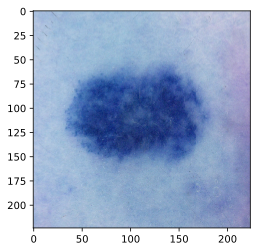

<Figure size 432x288 with 0 Axes>

Источник: class: melanoma, file: melanoma/ISIC_0000147.jpg
Предсказано: класс: pigmented benign keratosis, с вероятностью: 0.976357
Предсказано: класс: melanoma, с вероятностью: 0.011556
Предсказано: класс: nevus, с вероятностью: 0.007737


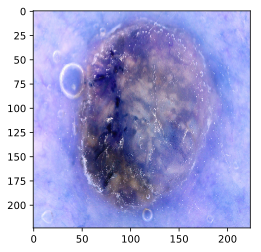

Источник: class: nevus, file: nevus/ISIC_0000229.jpg
Предсказано: класс: pigmented benign keratosis, с вероятностью: 0.662830
Предсказано: класс: melanoma, с вероятностью: 0.078128
Предсказано: класс: nevus, с вероятностью: 0.069038


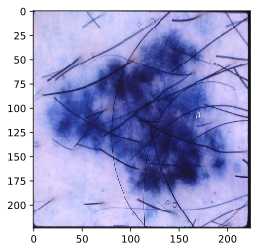

<Figure size 432x288 with 0 Axes>

In [176]:
for idx, filename in enumerate(random.sample(test_generator.filenames, 3)):
    print("Источник: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("Предсказано: класс: %s, с вероятностью: %f" % (classes[prediction[0][0]], prediction[1][0]))
    print("Предсказано: класс: %s, с вероятностью: %f" % (classes[prediction[0][1]], prediction[1][1]))
    print("Предсказано: класс: %s, с вероятностью: %f" % (classes[prediction[0][2]], prediction[1][2]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()

In [ ]:
# Ниже работающий вериант версии 2

In [ ]:
#base_model = Xception(weights='imagenet', include_top=False, input_shape = input_shape)

In [ ]:
#x = base_model.output
#x = GlobalAveragePooling2D()(x)
## let's add a fully-connected layer
#x = Dense(256, activation='relu')(x)
#x = Dropout(0.25)(x)
## and a logistic layer -- let's say we have 10 classes
#predictions = Dense(9, activation='softmax')(x)

# this is the model we will train
#model = Model(inputs=base_model.input, outputs=predictions)
#model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=0.001), metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
#checkpoint = ModelCheckpoint('best_model.hdf5' , monitor = ['val_accuracy'] , verbose = 1  , mode = 'max')
#callbacks_list = [checkpoint]

In [ ]:

#history = model.fit_generator(
#        train_generator,
#        steps_per_epoch = len(train_generator),
#        validation_data = test_generator, 
#        validation_steps = len(test_generator),
#        epochs = EPOCHS,
#        callbacks = callbacks_list
#)

In [ ]:
# сохраним итоговую сеть и подгрузим лучшую итерацию в обучении (best_model)
#model.save('../working/model_last.hdf5')
#model.load_weights('best_model.hdf5')

In [ ]:
#scores = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)
#print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
 
#epochs = range(len(acc))
 
#plt.plot(epochs, acc, 'b', label='Training acc')
#plt.plot(epochs, val_acc, 'r', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.legend()
 
#plt.figure()
 
#plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.title('Training and validation loss')
#plt.legend()
 
#plt.show()

**define loss and optimizer method ...**

In [ ]:
#model.compile(loss = "categorical_crossentropy",
#              optimizer = "rmsprop",
#              metrics = ["accuracy"])
#batch_size = 250

**We get various images by zooming and rotating and flipping **

In [ ]:
#train_datagen = ImageDataGenerator(rescale= 1./255,
#                   shear_range = 0.3,
#                   horizontal_flip=True,
#                   zoom_range = 0.3)

#test_datagen = ImageDataGenerator(rescale= 1./255)


#hist = model.fit_generator(
#        generator = train_generator,
#        steps_per_epoch = 5000,
#        epochs=1,
#        validation_data = test_generator,
#        validation_steps = 250)

In [ ]:
#train_generator = train_datagen.flow_from_directory(
#        train_path, 
#        target_size=(299,299),
#        batch_size = batch_size,
#        color_mode= "rgb",
#        class_mode= 'categorical')

#test_generator = test_datagen.flow_from_directory(
#        test_path, 
#        target_size=(299,299),
#        batch_size = batch_size,
##        color_mode= "rgb",
#        class_mode= 'categorical')


In [ ]:
#hist = model.fit_generator(
#        generator = train_generator,
#        steps_per_epoch = 5000,
#        epochs=1,
#        validation_data = test_generator,
#        validation_steps = 250)

**if you want to save the train weights like me, you must push to internet button in setting on right vertical menu ** 

In [ ]:
#model.save_weights("weights.h5")

accuracy= 0,20 this is mean that dataset is not corrrect separetaly pehh ;)